In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install control
import control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.5 MB/s eta 0:00:00


In [4]:
file = '/content/drive/MyDrive/nrdz/test.bin'
f = np.fromfile(open(file), dtype=np.complex64)

In [5]:


# avg across full cycle of tone (function of how many samples you have per cycle)
averages = []
for i in range(len(f[::10000])):
  averages.append(np.mean(
      (np.abs((f[i*10000:(i+1)*10000])))**2 # in scale of power
  ))
samples = averages

samples_dB = control.mag2db(samples)

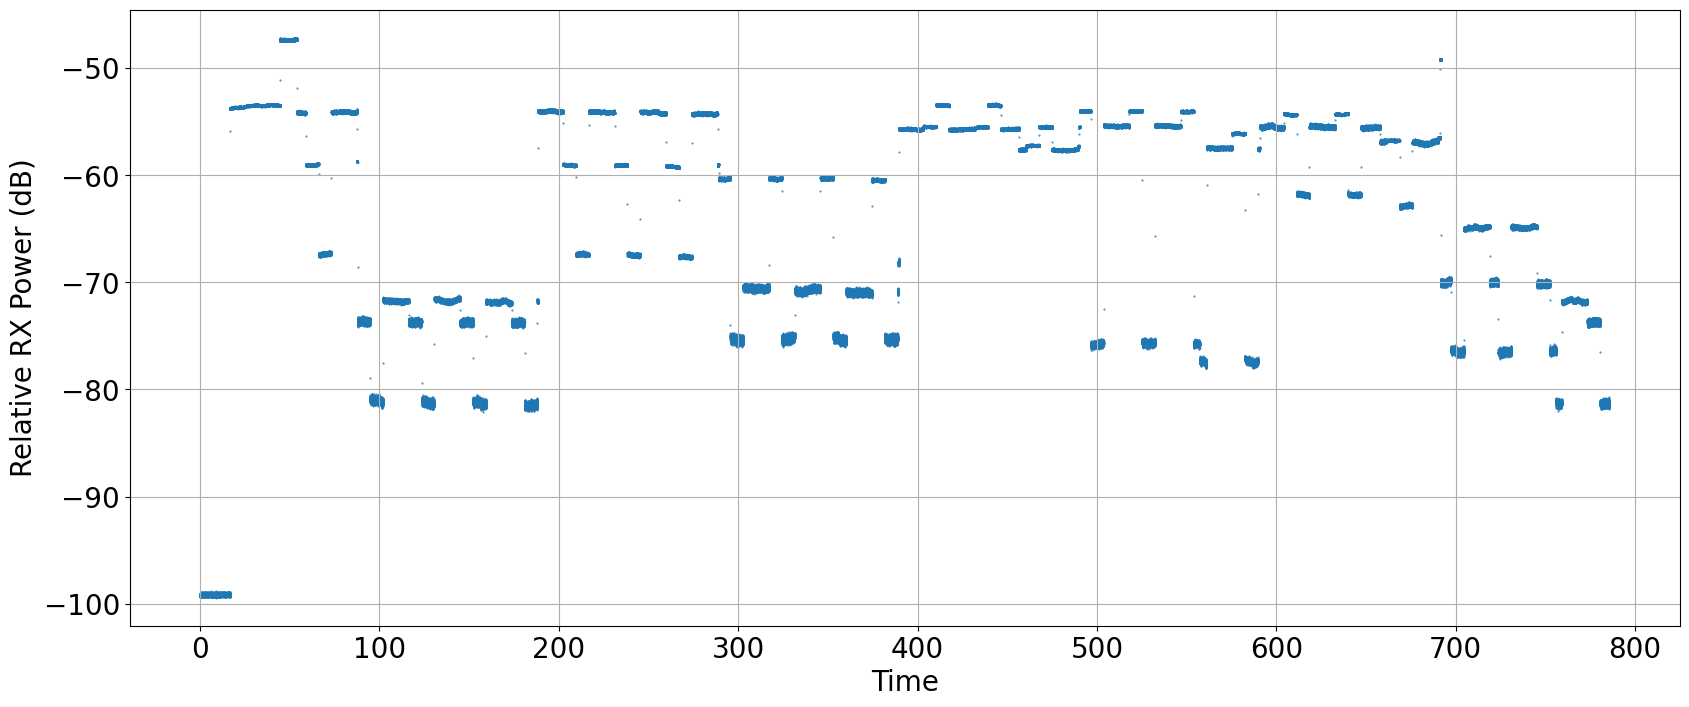

In [10]:
plt.scatter(np.divide(range(0,len(samples_dB)), 250),(samples_dB),s=0.2)
plt.rcParams.update({'font.size': 20})
plt.xlabel("Time")
# plt.xticks(range(0,90, 5))
plt.ylabel("Relative RX Power (dB)")
plt.rcParams["figure.figsize"] = (20, 8)
#plt.ylim([-100,-90])
# plt.xlim([33,48])
plt.grid()

plt.show()